In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Import Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving financial_goal_data.csv to financial_goal_data.csv


**Load Dataset**

In [3]:
# Load the dataset
import pandas as pd

# File path
file_path = 'financial_goal_data.csv'

# Load dataset
data = pd.read_csv(file_path)

# Display the first few rows and general info
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   income              10000 non-null  int64
 1   expenses_listrik    10000 non-null  int64
 2   expenses_transport  10000 non-null  int64
 3   expenses_makanan    10000 non-null  int64
 4   goal_amount         10000 non-null  int64
 5   goal_duration       10000 non-null  int64
 6   remaining_time      10000 non-null  int64
 7   goal_achievable     10000 non-null  int64
 8   current_savings     10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


(     income  expenses_listrik  expenses_transport  expenses_makanan  \
 0  10000000           1000000             1000000           2500000   
 1  12000000            800000              500000           3000000   
 2   8000000            700000              600000           1500000   
 3  12000000            500000             1200000           2500000   
 4  12000000            700000              800000           1500000   
 
    goal_amount  goal_duration  remaining_time  goal_achievable  \
 0     20000000              9               8                1   
 1     30000000              3               2                0   
 2     20000000              9               7                1   
 3     10000000              9               8                1   
 4     25000000             12              12                1   
 
    current_savings  
 0          1800000  
 1          5700000  
 2          2900000  
 3          3500000  
 4           900000  ,
 None,
              income  

**Menambahkan Kolom Total/Alokasi**

In [4]:
# Tambahkan kolom total_expenses
data['total_expenses'] = (
    data['expenses_makanan'] + data['expenses_transport'] + data['expenses_listrik']
)

In [5]:
print(data[['expenses_makanan', 'expenses_transport', 'expenses_listrik', 'total_expenses']].head())

   expenses_makanan  expenses_transport  expenses_listrik  total_expenses
0           2500000             1000000           1000000         4500000
1           3000000              500000            800000         4300000
2           1500000              600000            700000         2800000
3           2500000             1200000            500000         4200000
4           1500000              800000            700000         3000000


**PreProcessing**

- Menghitung Rasio

In [6]:
# Rasio income terhadap total expenses
data['income_to_expenses_ratio'] = data['income'] / data['total_expenses']

In [7]:
X_fe = data.copy()

# Rasio aktual pengeluaran terhadap total pengeluaran
X_fe['ratio_expenses_makanan'] = X_fe['expenses_makanan'] / X_fe['total_expenses']
X_fe['ratio_expenses_transport'] = X_fe['expenses_transport'] / X_fe['total_expenses']
X_fe['ratio_expenses_listrik'] = X_fe['expenses_listrik'] / X_fe['total_expenses']

In [8]:
# Mengecek potensi masalah jika ada pembagian angka 0 dalam data
X_fe['ratio_expenses_makanan'] = X_fe['expenses_makanan'] / (X_fe['total_expenses'] + 1e-9)
X_fe['ratio_expenses_transport'] = X_fe['expenses_transport'] / (X_fe['total_expenses'] + 1e-9)
X_fe['ratio_expenses_listrik'] = X_fe['expenses_listrik'] / (X_fe['total_expenses'] + 1e-9)

In [9]:
# Cek beberapa baris pertama untuk memastikan kolom ditambahkan
print(X_fe[['expenses_makanan', 'expenses_transport', 'expenses_listrik',
            'total_expenses', 'ratio_expenses_makanan',
            'ratio_expenses_transport', 'ratio_expenses_listrik']].head())

# Verifikasi bahwa jumlah dari semua rasio mendekati 1
X_fe['ratio_sum'] = (
    X_fe['ratio_expenses_makanan'] +
    X_fe['ratio_expenses_transport'] +
    X_fe['ratio_expenses_listrik']
)
print(X_fe['ratio_sum'].describe())

   expenses_makanan  expenses_transport  expenses_listrik  total_expenses  \
0           2500000             1000000           1000000         4500000   
1           3000000              500000            800000         4300000   
2           1500000              600000            700000         2800000   
3           2500000             1200000            500000         4200000   
4           1500000              800000            700000         3000000   

   ratio_expenses_makanan  ratio_expenses_transport  ratio_expenses_listrik  
0                0.555556                  0.222222                0.222222  
1                0.697674                  0.116279                0.186047  
2                0.535714                  0.214286                0.250000  
3                0.595238                  0.285714                0.119048  
4                0.500000                  0.266667                0.233333  
count    1.000000e+04
mean     1.000000e+00
std      7.519627e-17
min

In [10]:
X_fe['total_ratio'] = X_fe['ratio_expenses_makanan'] + X_fe['ratio_expenses_transport'] + X_fe['ratio_expenses_listrik']

# Deskripsi statistik total rasio
print(X_fe['total_ratio'].describe())

count    1.000000e+04
mean     1.000000e+00
std      7.519627e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: total_ratio, dtype: float64


- Missing Value dan Outlier

In [11]:
# Cek missing values
print("Missing values:\n", data.isnull().sum())

# Descriptive statistics
print(data.describe())

Missing values:
 income                      0
expenses_listrik            0
expenses_transport          0
expenses_makanan            0
goal_amount                 0
goal_duration               0
remaining_time              0
goal_achievable             0
current_savings             0
total_expenses              0
income_to_expenses_ratio    0
dtype: int64
             income  expenses_listrik  expenses_transport  expenses_makanan  \
count  1.000000e+04      10000.000000        1.000000e+04      1.000000e+04   
mean   9.480880e+06     715590.000000        8.033800e+05      2.250950e+06   
std    3.097537e+06     171139.945039        2.375336e+05      5.573420e+05   
min    5.000000e+06     500000.000000        5.000000e+05      1.500000e+06   
25%    7.000000e+06     600000.000000        6.000000e+05      1.500000e+06   
50%    8.000000e+06     700000.000000        8.000000e+05      2.500000e+06   
75%    1.200000e+07     800000.000000        1.000000e+06      2.500000e+06   
max    1

- Pisahkan Fitur dan Target

In [12]:
# Fitur
X = X_fe[['income', 'total_expenses']]

# Label (multi-output target)
y = X_fe[['ratio_expenses_makanan', 'ratio_expenses_transport', 'ratio_expenses_listrik']]

- Normalisasi Fitur

In [13]:
# Tambahkan 'total_expenses' ke dalam daftar fitur numerik untuk normalisasi
numeric_features = ['income', 'total_expenses', 'expenses_listrik',
                    'expenses_transport', 'expenses_makanan',
                    'goal_amount', 'current_savings']

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

**Pembuatan Model**
- Inisialisasi TensorFlow

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(2,)),  # Dua fitur: income dan total_expenses
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output: rasio makanan, transport, listrik
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Tampilkan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

**Evaluasi Model**
- Training dan Evaluasi

In [16]:
# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluasi model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MAE: {mae}")

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0596 - mae: 0.1946 - val_loss: 0.0533 - val_mae: 0.1825
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0544 - mae: 0.1846 - val_loss: 0.0527 - val_mae: 0.1825
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0535 - mae: 0.1835 - val_loss: 0.0526 - val_mae: 0.1827
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0532 - mae: 0.1828 - val_loss: 0.0521 - val_mae: 0.1817
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0529 - mae: 0.1826 - val_loss: 0.0518 - val_mae: 0.1808
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0528 - mae: 0.1820 - val_loss: 0.0515 - val_mae: 0.1811
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0531 - mae: 0.1835 - val_loss: 0.0512 - val_mae: 0.1809
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0530 - mae: 0.1829 - val_loss: 0.0508 - val_mae: 0.1797
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

**Simpan Model h5**

In [17]:
# Simpan model
model.save('ideal_expenses_model.h5')

# Untuk memuat kembali model
loaded_model = tf.keras.models.load_model('ideal_expenses_model.h5')

In [18]:
import pickle

# Simpan scaler ke file .pkl
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

print("Scaler berhasil disimpan ke scaler_X.pkl dan scaler_y.pkl")

Scaler berhasil disimpan ke scaler_X.pkl dan scaler_y.pkl


**Post Processing**

In [19]:
# Dummy input pengguna
income_user = 5000000
total_expenses_user = 3000000

# Normalisasi input
user_input = scaler_X.transform([[income_user, total_expenses_user]])

# Prediksi rasio pengeluaran dari model
predicted_ratios = loaded_model.predict(user_input)

# Normalisasi ulang rasio agar totalnya = 1
normalized_ratios = predicted_ratios[0] / sum(predicted_ratios[0])

# Bagikan total_expenses_user berdasarkan rasio yang telah dinormalisasi
ideal_expenses_makanan = normalized_ratios[0] * total_expenses_user
ideal_expenses_transport = normalized_ratios[1] * total_expenses_user
ideal_expenses_listrik = normalized_ratios[2] * total_expenses_user

# Cetak hasil
print("Pengeluaran Ideal Makanan:", ideal_expenses_makanan)
print("Pengeluaran Ideal Transport:", ideal_expenses_transport)
print("Pengeluaran Ideal Listrik:", ideal_expenses_listrik)

# Validasi: Total pengeluaran ideal harus sama dengan total_expenses_user
total_ideal_expenses = ideal_expenses_makanan + ideal_expenses_transport + ideal_expenses_listrik
print("\nValidasi: Total Pengeluaran Ideal =", total_ideal_expenses)
print("Total Expenses User =", total_expenses_user)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Pengeluaran Ideal Makanan: 1025457.2331905365
Pengeluaran Ideal Transport: 985696.5243816376
Pengeluaran Ideal Listrik: 988846.1530208588

Validasi: Total Pengeluaran Ideal = 2999999.910593033
Total Expenses User = 3000000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
print("Total Rasio Prediksi:", sum(predicted_ratios[0]))

Total Rasio Prediksi: 0.9999999701976776


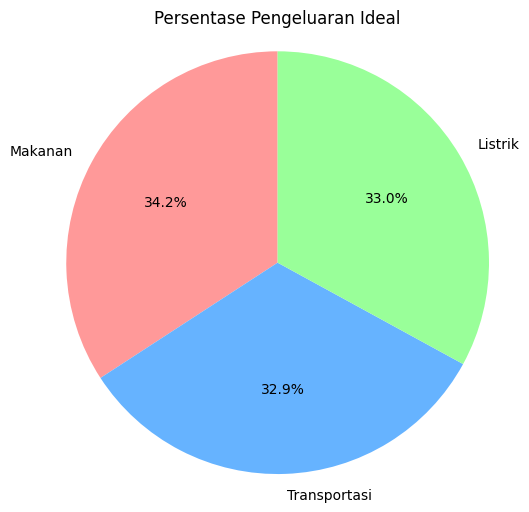

In [21]:
import matplotlib.pyplot as plt

# Data persentase dari pengeluaran ideal
labels = ['Makanan', 'Transportasi', 'Listrik']
sizes = [
    ideal_expenses_makanan,
    ideal_expenses_transport,
    ideal_expenses_listrik,
]

# Warna untuk setiap kategori
colors = ['#ff9999','#66b3ff','#99ff99']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Persentase Pengeluaran Ideal")
plt.axis('equal')  # Menjaga pie chart tetap bulat
plt.show()

In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [ ]:
!tensorflowjs_converter --input_format keras \
ideal_expenses_model.h5 \
/content/ideal_expenses_model_js

2024-12-10 15:38:19.801493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733845099.865597    4613 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733845099.879575    4613 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 15:38:19.931274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed

In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>